In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [10]:
from implementations import preprocess
tX_train, ty_train, tX_test, ty_test, cont_features = preprocess(X_train, y_train, X_test, encodable_threshold=0.5, imputable_threshold=0.5)

In [12]:
tX_train

array([[ 1.        ,  0.06833197,  0.40768027, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.55250482,  0.54013641, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  3.19515553,  1.09655998, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.31931645, -0.13086367, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.84532397, -0.30297338, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.66533608, -0.25352276, ...,  0.        ,
         0.        ,  0.        ]])

In [13]:
tX_train.shape, tX_test.shape

((250000, 31), (568238, 31))

Best Accuracy : 71.3685% reached at epoch 99
Best Accuracy : 70.804% reached at epoch 99
Best Accuracy : 70.895% reached at epoch 99
Best Accuracy : 70.48400000000001% reached at epoch 99
Best Accuracy : 70.27% reached at epoch 99
Lambda = 0.0001
Degree = 1
Accuracy = 70.82000000000001%
F1 Score = 0.6742771435337176
Loss = 0.558924704264603


Best Accuracy : 71.3965% reached at epoch 99
Best Accuracy : 70.8365% reached at epoch 99
Best Accuracy : 70.9385% reached at epoch 99
Best Accuracy : 70.537% reached at epoch 99
Best Accuracy : 70.3045% reached at epoch 99
Lambda = 0.001
Degree = 1
Accuracy = 70.85239999999999%
F1 Score = 0.6741895537376316
Loss = 0.5583631754453391


Best Accuracy : 71.601% reached at epoch 99
Best Accuracy : 71.14200000000001% reached at epoch 99
Best Accuracy : 71.3315% reached at epoch 99
Best Accuracy : 70.9405% reached at epoch 99
Best Accuracy : 70.595% reached at epoch 99
Lambda = 0.01
Degree = 1
Accuracy = 71.15799999999999%
F1 Score = 0.6740515759507468

ValueError: x and y must have same first dimension, but have shapes (5,) and (30,)

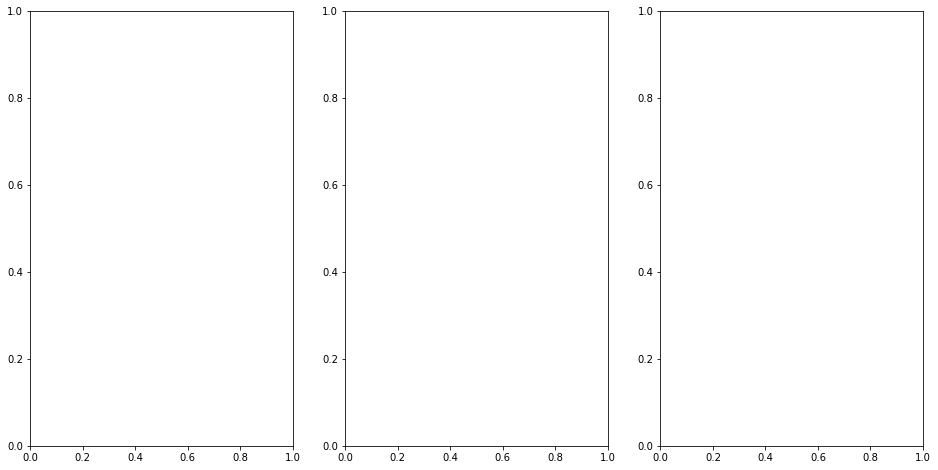

In [16]:
from implementations import logistic_regression_cv
weights, loss, lambda_, degree, accuracy, f1 = logistic_regression_cv(ty_train, tX_train, cont_features=cont_features, verbose=True)

In [41]:
weights, loss, lambda_, degree, accuracy, f1

(array([[ 0.24183977],
        [-0.26544805],
        [ 0.37138584],
        [ 0.30515328],
        [ 0.91327956],
        [ 0.17158336],
        [ 0.53986589],
        [-0.36120854],
        [ 0.19929079],
        [ 0.35773507],
        [-0.06072972],
        [ 0.29187704],
        [ 0.12951111],
        [ 0.11767485],
        [ 0.33113117],
        [ 0.20211105],
        [ 0.23329362],
        [-0.09106707],
        [ 0.21601779],
        [-0.04322265],
        [-0.05206696],
        [ 0.23535913],
        [ 0.1280109 ],
        [ 0.27909552],
        [-0.22777135],
        [ 0.03490579],
        [-0.60286866],
        [ 0.16207475],
        [-0.32180454],
        [-0.01908622],
        [-0.02063272],
        [-0.01574469],
        [ 0.31183612],
        [-0.03238049],
        [-0.04039736],
        [ 0.07057688],
        [ 0.02495367],
        [-0.17392018],
        [ 0.02440933],
        [-0.00554544],
        [-0.10049804],
        [-0.03536644],
        [-0.26242361],
        [-0

Iteration 0/1000
Accuracy = 34.266799999999996%
Loss = 7.512752747308656


Iteration 10/1000
Accuracy = 57.414%
Loss = 1.3267212383098728


Iteration 20/1000
Accuracy = 65.9532%
Loss = 0.7310928001903751


Iteration 30/1000
Accuracy = 69.5332%
Loss = 0.605709180975117


Iteration 40/1000
Accuracy = 72.36359999999999%
Loss = 0.5472410645509806


Iteration 50/1000
Accuracy = 74.422%
Loss = 0.5174312370894415


Iteration 60/1000
Accuracy = 75.69839999999999%
Loss = 0.5021529876141859


Iteration 70/1000
Accuracy = 76.472%
Loss = 0.49377191008399235


Iteration 80/1000
Accuracy = 76.92999999999999%
Loss = 0.48894913573336474


Iteration 90/1000
Accuracy = 77.216%
Loss = 0.48605760412051635


Iteration 100/1000
Accuracy = 77.3864%
Loss = 0.4842656778429128


Iteration 110/1000
Accuracy = 77.4828%
Loss = 0.4831340905769937


Iteration 120/1000
Accuracy = 77.58040000000001%
Loss = 0.4824060934123485


Iteration 130/1000
Accuracy = 77.6628%
Loss = 0.48192887450566024


Iteration 140/1000
Accur

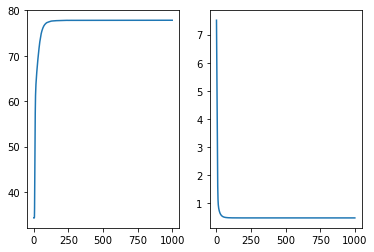

In [39]:
from implementations import logistic_regression, build_poly
tX_train_poly = build_poly(tX_train, degree=2, cont_features=cont_features)
loss, weights = logistic_regression(ty_train, tX_train_poly, max_iters=1000, lambda_=0.05, verbose=True)

In [299]:
tX_test.shape

(568238, 34)

In [300]:
from implementations import build_poly
tX_test = build_poly(tX_test, degree, cont_features)

In [301]:
tX_test.shape

(568238, 48)

In [302]:
from datetime import datetime
from implementations import predict
method = 'logistic_regression'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'submissions/submission_{method}_{time}' # TODO: fill in desired name of output file for submission
y_pred = predict(weights, tX_test)
y_pred[np.where(y_pred == 0)] = -1
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)